# Adult income dataset

Understanding the factors that influence an individual's annual income is paramount for economists, policymakers, and individuals alike. Factors such as education level, age, gender, and occupation play a crucial role in shaping one's financial well-being. This dataset offers a comprehensive view of these influences through 14 descriptive attributes, aiming to categorize individuals into two income groups: those earning <=50K and those earning >50K annually. By delving into this dataset, we can embark on a fascinating journey to uncover the intricate relationships between personal characteristics and income levels, utilizing data preprocessing and machine learning techniques to predict an individual’s income bracket based on their personal information. This endeavor not only serves as an excellent primer for those new to data science but also provides valuable insights into the dynamics of income distribution.

In [74]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
data = pd.read_csv(r"C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 28\adult.csv")

## 1. Explore the data

In [76]:
data.shape

(48842, 15)

In [77]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 1.1 What is the distribution of the values of each column?

C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_43652\644069270.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index.astype(str), rotation=90, fontsize=8)
C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_43652\644069270.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index.astype(str), rotation=90, fontsize=8)
C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_43652\644069270.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index.astype(str), rotation=90, fontsize=8)
C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_43652\644069270.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index.astype(str), rotation=90, fontsize=8)
C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_43652\644069270.py:12: UserWarning: FixedForma

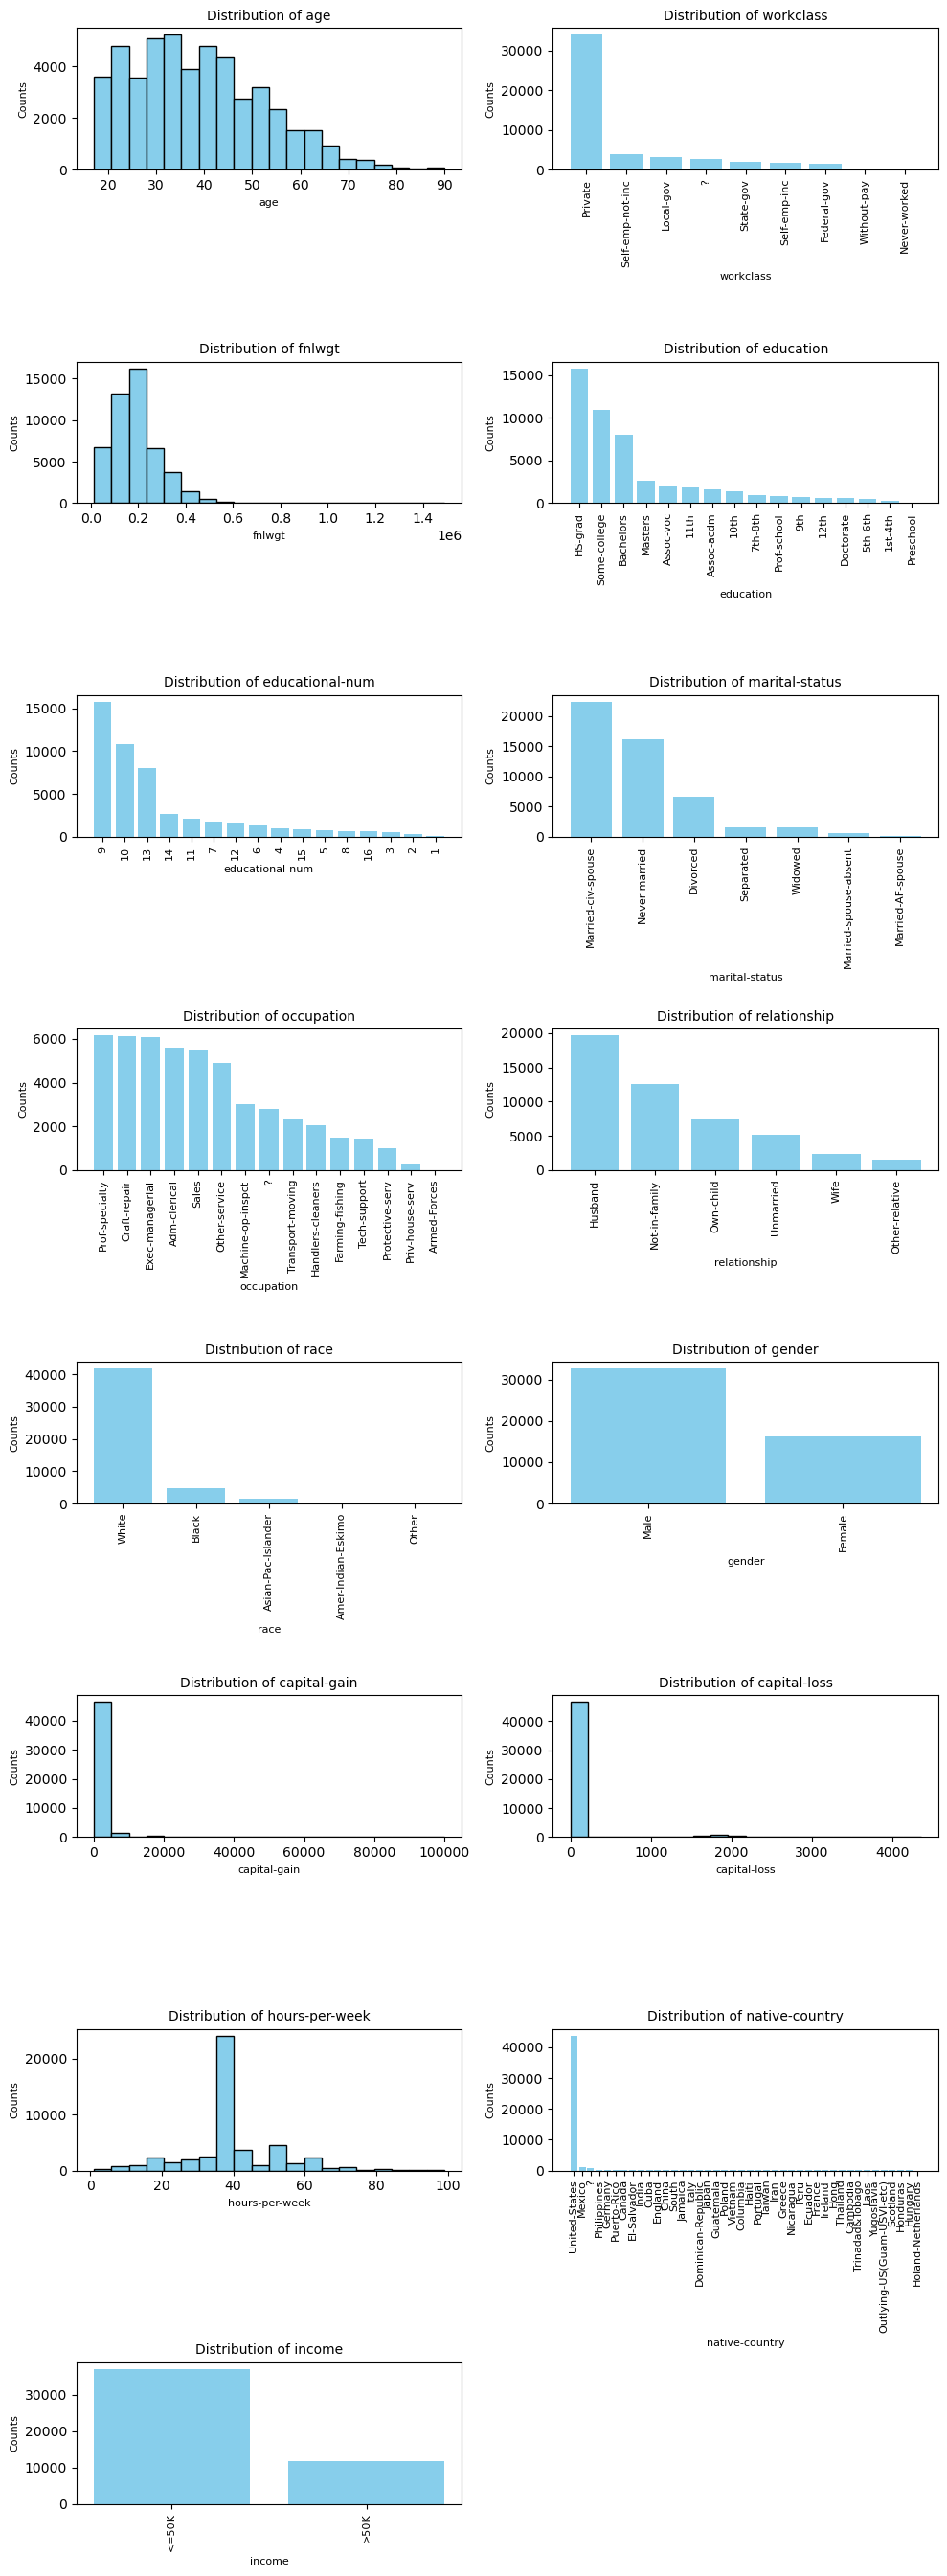

In [79]:
columns_name = data.columns
n_rows = 8
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 27)) 
axes = axes.flatten()  

for i, column in enumerate(columns_name):
    ax = axes[i]
    if data[column].dtype == 'object' or len(data[column].unique()) < 20:  
        value_counts = data[column].value_counts()
        ax.bar(value_counts.index.astype(str), value_counts.values, color='skyblue') 
        ax.set_xticklabels(value_counts.index.astype(str), rotation=90, fontsize=8)
    else:  # Numerical data
        ax.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {column}', fontsize=10)
    ax.set_ylabel('Counts', fontsize=8)
    ax.set_xlabel(column, fontsize=8)

for j in range(i + 1, n_rows * n_cols):
    axes[j].axis('off')

plt.tight_layout()  

plt.show()

### 1.2 How is the distribution of the values of each column different between income >=50K and <50K group?

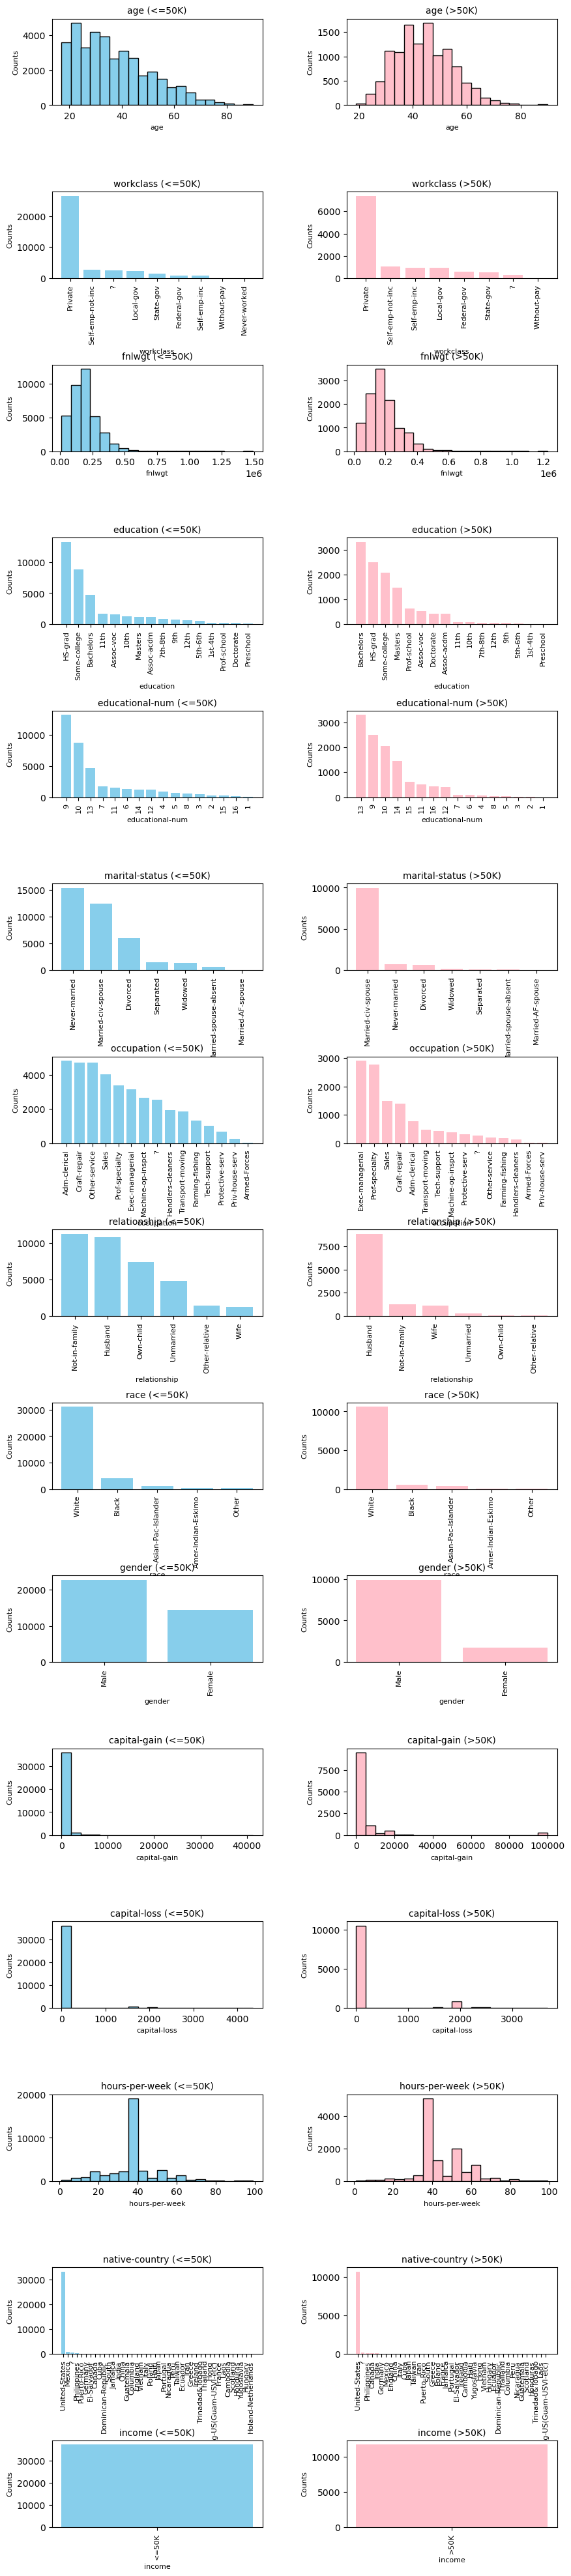

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

n_rows = 15  
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 50))  
axes = axes.flatten()

for i, column in enumerate(columns_name):
    income_groups = ["<=50K", ">50K"]
    colors = ['skyblue', 'pink']

    for idx, (income_group, color) in enumerate(zip(income_groups, colors)):
        ax_idx = 2 * i + idx  
        ax = axes[ax_idx]
        filtered_data = data[data['income'] == income_group]

        if filtered_data[column].dtype == 'object' or len(filtered_data[column].unique()) < 20:
            value_counts = filtered_data[column].value_counts()
            ax.bar(value_counts.index.astype(str), value_counts.values, color=color)
            ax.set_xticks(range(len(value_counts.index)))  
            ax.set_xticklabels(value_counts.index.astype(str), rotation=90, fontsize=8)
        else:
            ax.hist(filtered_data[column], bins=20, color=color, edgecolor='black')
        
        ax.set_title(f'{column} ({income_group})', fontsize=10)
        ax.set_ylabel('Counts', fontsize=8)
        ax.set_xlabel(column, fontsize=8)

plt.subplots_adjust(hspace=1, wspace=0.4)  # Adjust horizontal and vertical spacing

plt.show()

According to the histogram, both groups show different demographics in almost all areas. 
The next question would be: 

### 1.3 Which features influence income the most out of all these 14 features?

Top 20 Feature Importances:
fnlwgt: 0.1690
age: 0.1531
capital-gain: 0.0909
hours-per-week: 0.0843
marital-status_Married-civ-spouse: 0.0659
educational-num: 0.0592
relationship_Husband: 0.0408
capital-loss: 0.0315
marital-status_Never-married: 0.0219
occupation_Prof-specialty: 0.0172
occupation_Exec-managerial: 0.0172
education_Bachelors: 0.0130
relationship_Not-in-family: 0.0108
workclass_Private: 0.0101
gender_Female: 0.0101
gender_Male: 0.0097
relationship_Own-child: 0.0095
relationship_Wife: 0.0090
education_Masters: 0.0082
workclass_Self-emp-not-inc: 0.0079


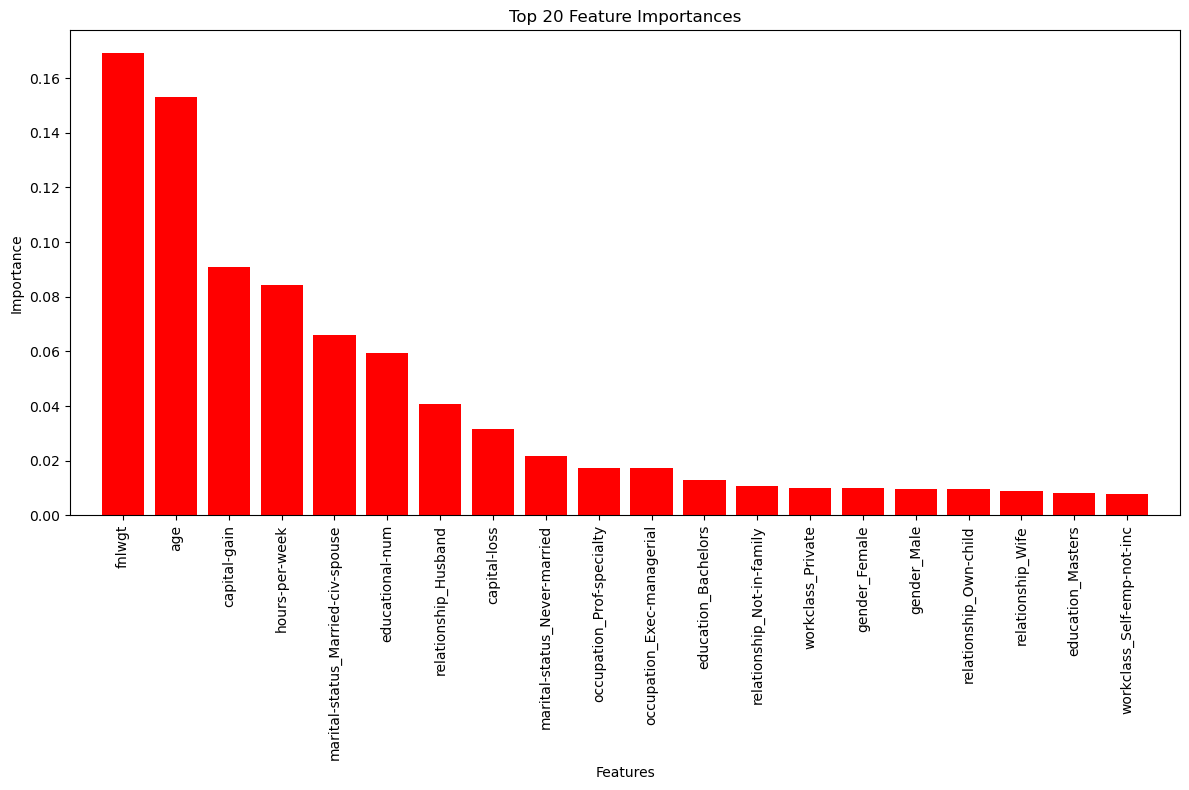

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np  # Make sure to import numpy
import matplotlib.pyplot as plt

# Encode the income column to numeric values
data['income'] = LabelEncoder().fit_transform(data['income'])

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data.drop('income', axis=1))

# Split data into features and target
X = data_encoded
y = data['income']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order and get their indices
indices = np.argsort(importances)[::-1]

# Selecting the top 20 features
top_n = 20
indices_top = indices[:top_n]

# Print the top 20 features
print("Top 20 Feature Importances:")
for i in indices_top:
    print(f"{X_train.columns[i]}: {importances[i]:.4f}")

# Plot the top 20 feature importances
plt.figure(figsize=(12, 8))
plt.title("Top 20 Feature Importances")
plt.bar(range(top_n), importances[indices_top], color="r", align="center")
plt.xticks(range(top_n), X_train.columns[indices_top], rotation=90)
plt.xlim([-1, top_n])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


### 1.4 Compute the correlation of each column

Columns kept: ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial',

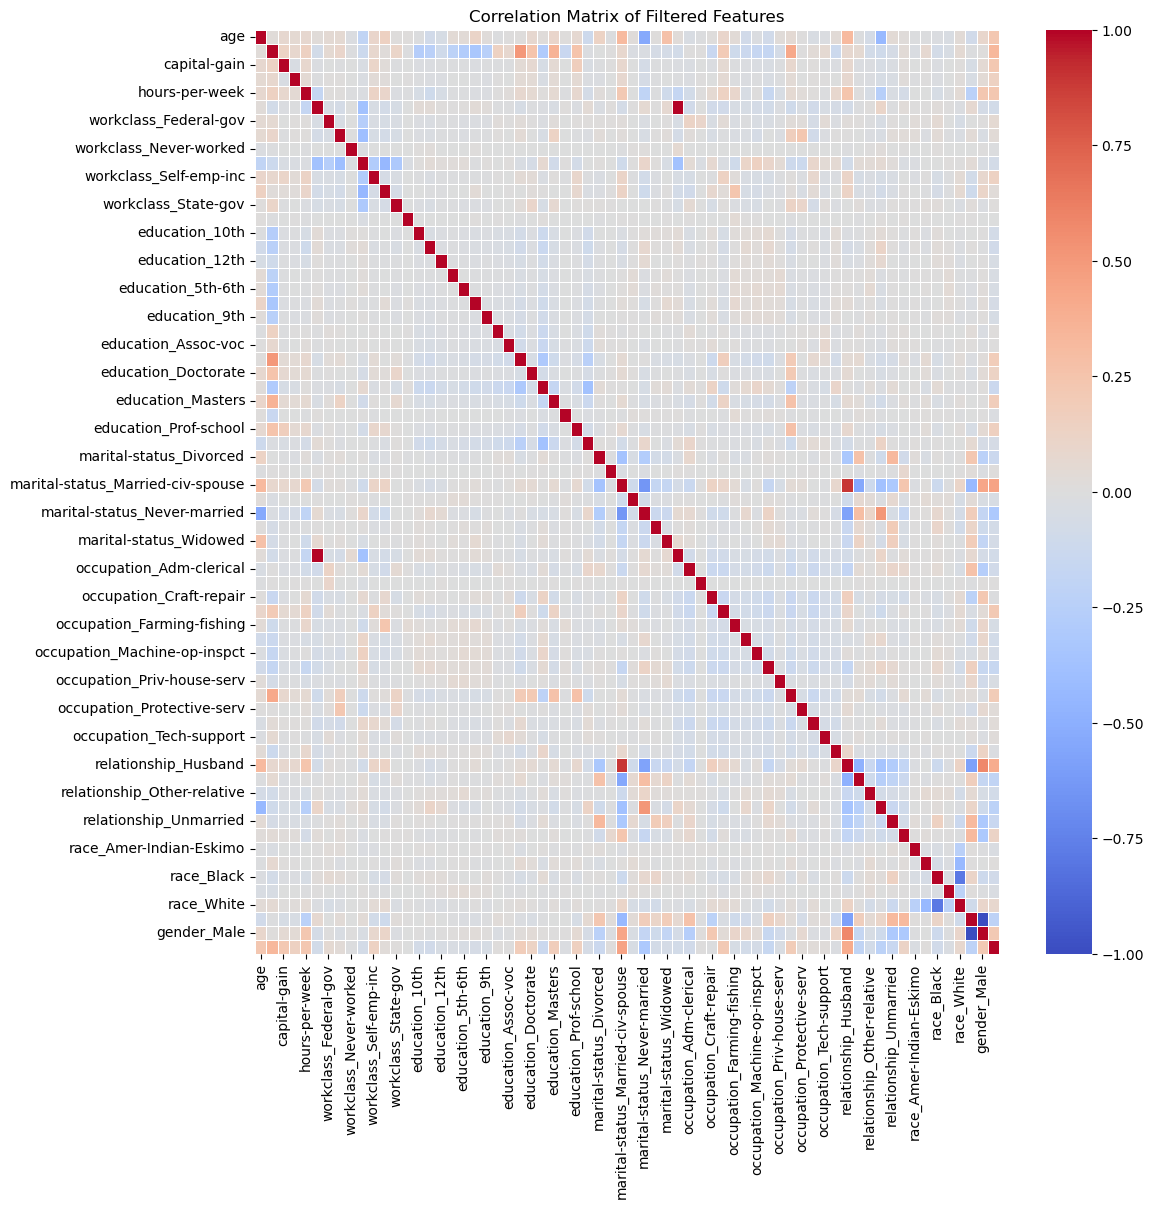

In [90]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the 'income' column to numeric values since it's the target variable
data['income'] = LabelEncoder().fit_transform(data['income'])

# Drop the specified columns before one-hot encoding the rest
data = data.drop(['native-country', 'fnlwgt'], axis=1)

# One-hot encode categorical variables and combine with the rest of the dataset
data_encoded = pd.get_dummies(data.drop(['income'], axis=1))
data_encoded['income'] = data['income']

# Calculate the correlation matrix
corr_matrix = data_encoded.corr().abs()  # Use absolute value to consider both positive and negative correlations

# Identify columns that have at least one correlation value >= 0.75 with another column
columns_to_keep = corr_matrix.columns[corr_matrix.any(axis=0) >= 0.75]

# Drop columns that don't meet the threshold by selecting the ones to keep
data_filtered = data_encoded[columns_to_keep]

print(f"Columns kept: {list(columns_to_keep)}")
print(f"Original number of features: {data_encoded.shape[1]}, New number of features: {data_filtered.shape[1]}")

plt.figure(figsize=(12, 12))
sns.heatmap(data_filtered.corr(), 
            cmap='coolwarm', 
            annot=False, 
            linewidths=.5)
plt.title('Correlation Matrix of Filtered Features')
plt.show()

### 1.5 Building a decision tree to predict whether a person has an income of ">50K"

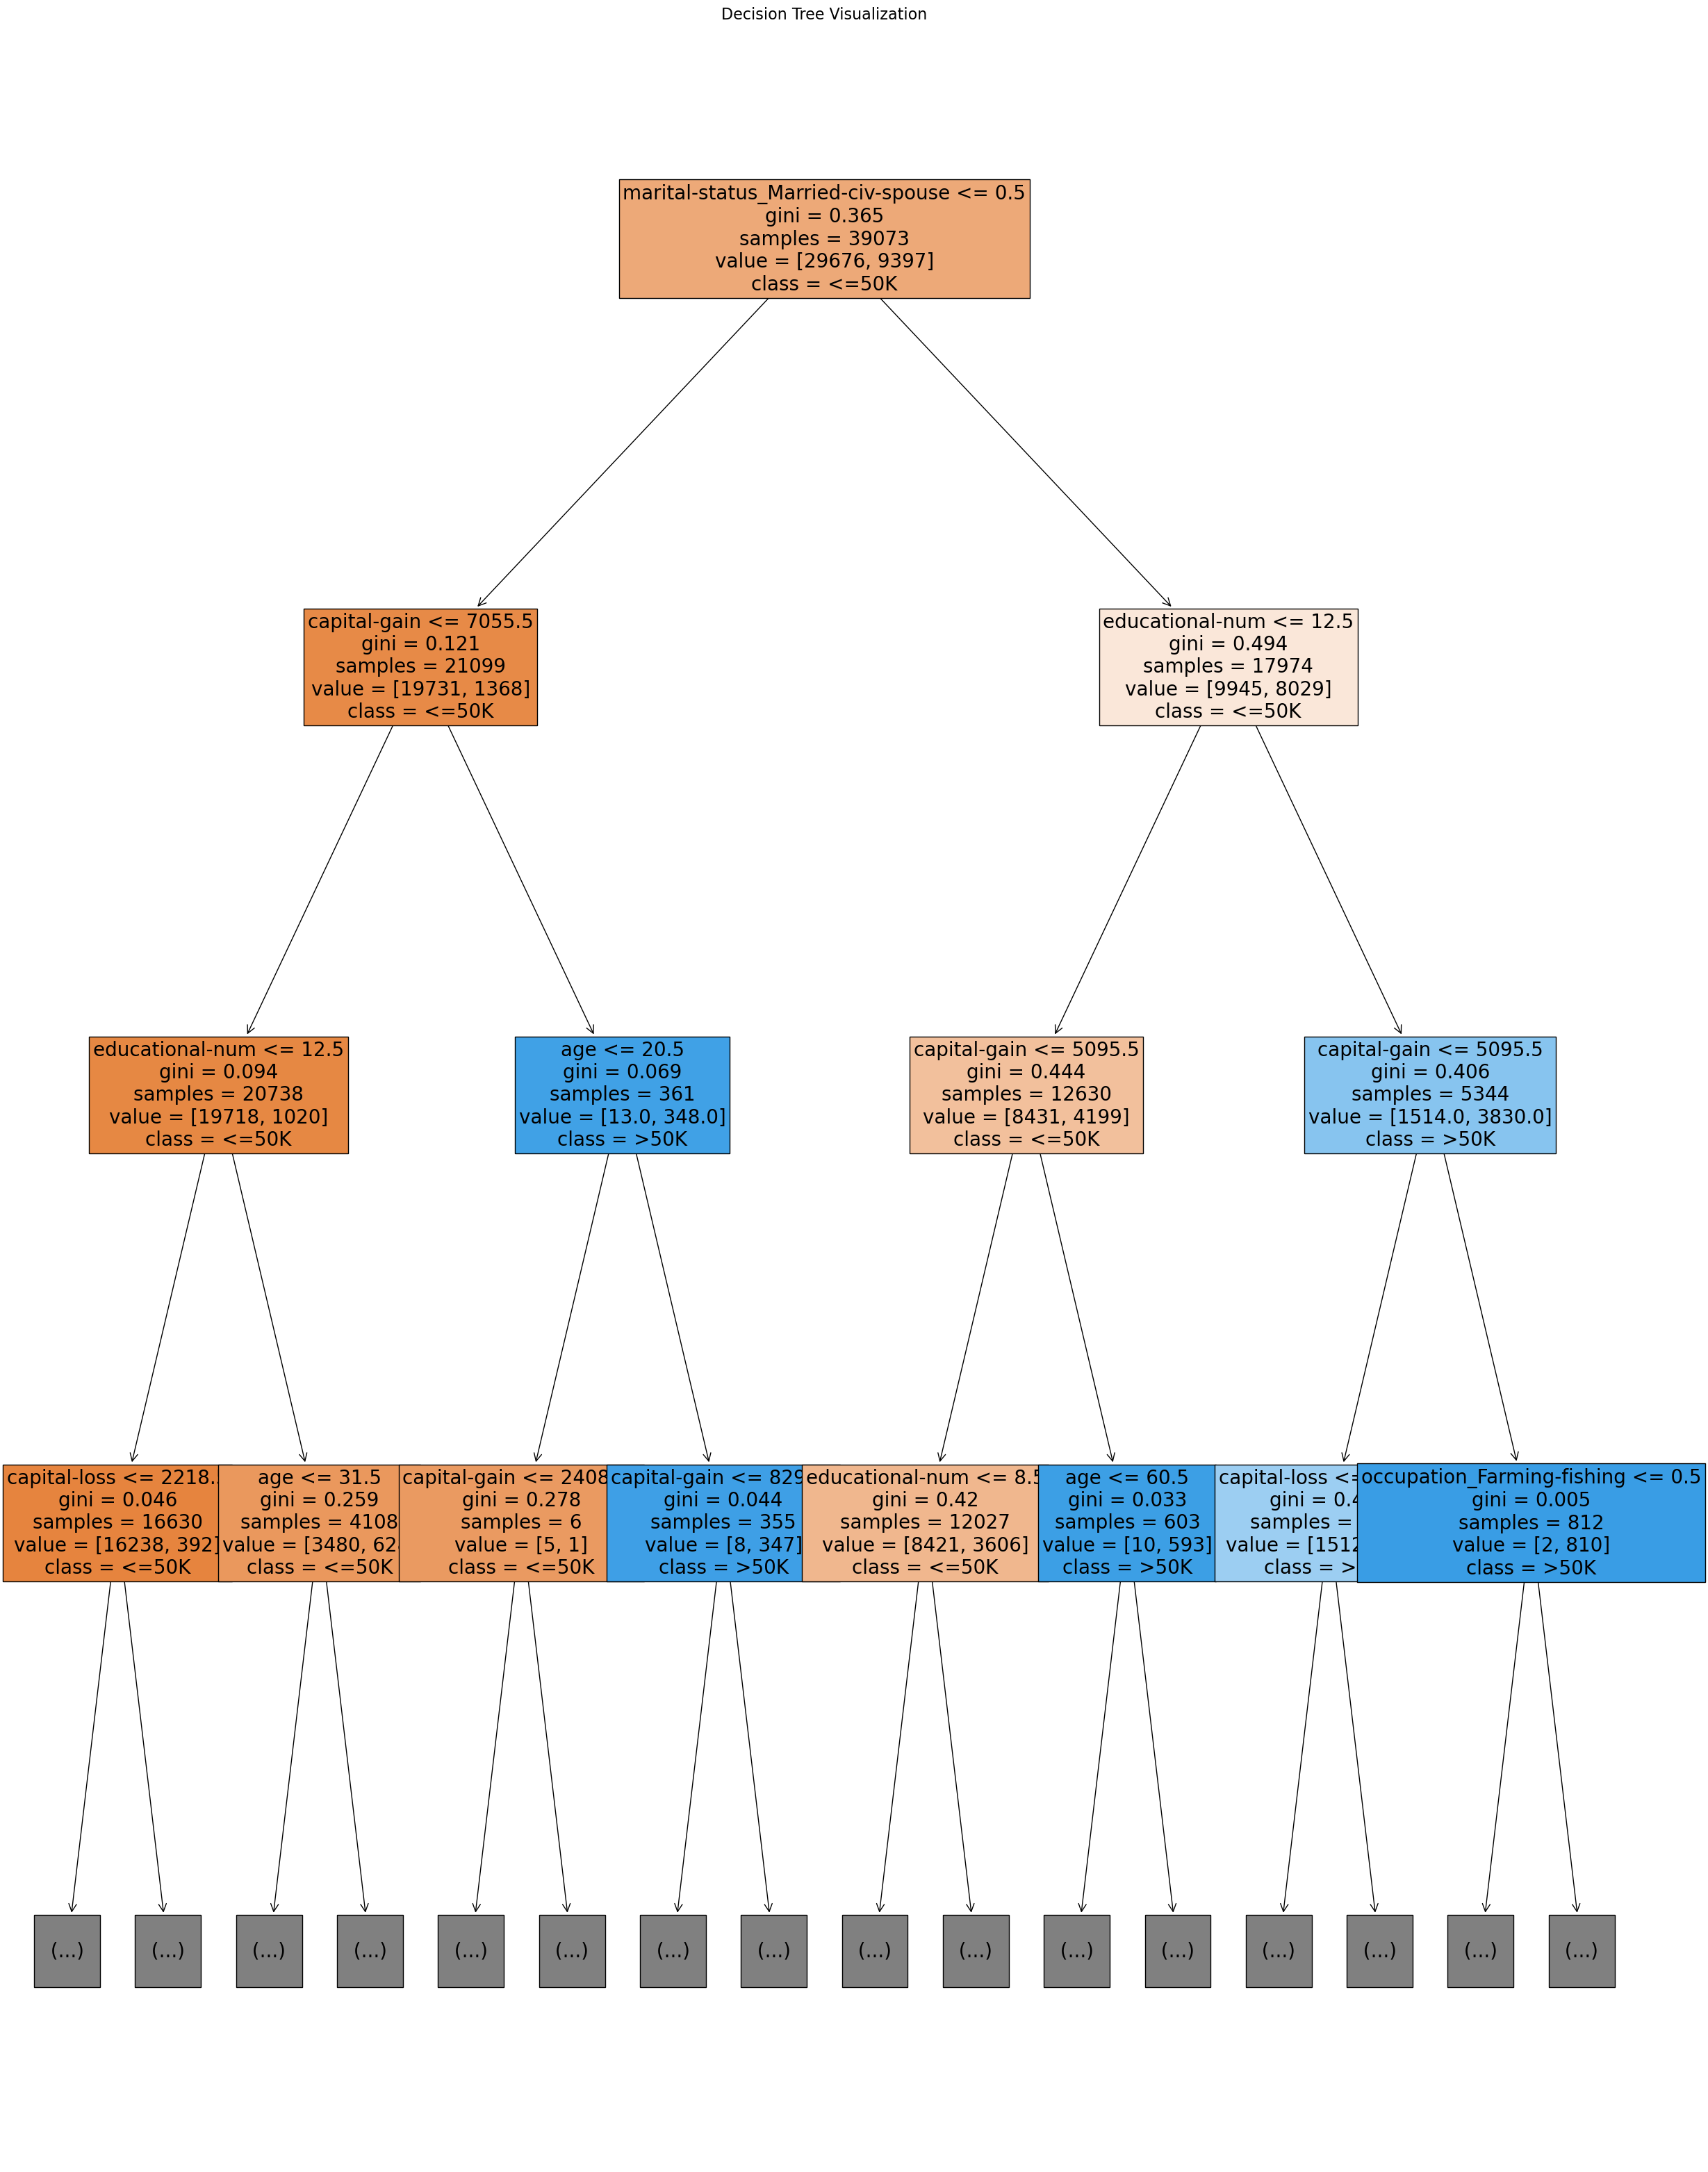

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

# Encode the 'income' column to numeric values since it's the target variable
data['income'] = LabelEncoder().fit_transform(data['income'])

# One-hot encode categorical variables and combine with the rest of the dataset
data_encoded = pd.get_dummies(data.drop(['income'], axis=1))
data_encoded['income'] = data['income']

# Split data into features (X) and target (y)
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with a maximum depth of 10
clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

plt.figure(figsize=(30, 40), dpi=100)  # Adjust figure size and DPI for better readability
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=["<=50K", ">50K"], max_depth=3, fontsize=20)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()